Rozmiar obrazu: (133, 200)
k dla 90%: 1
Energia dla k=1: 0.9408149220551503


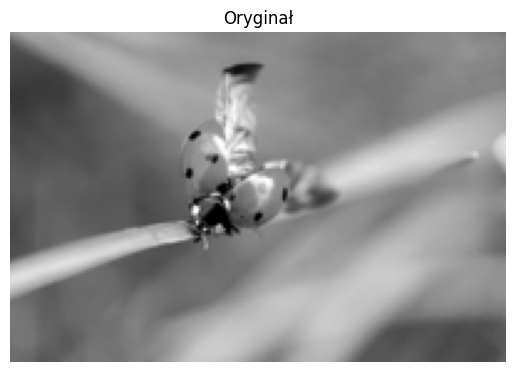

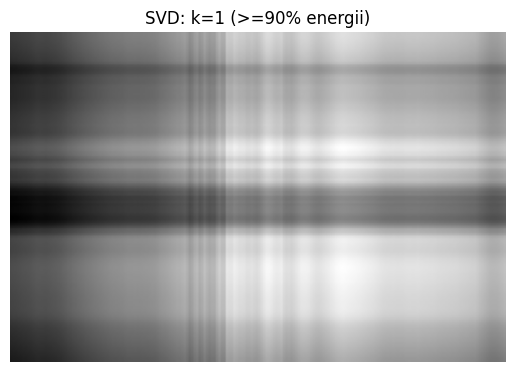

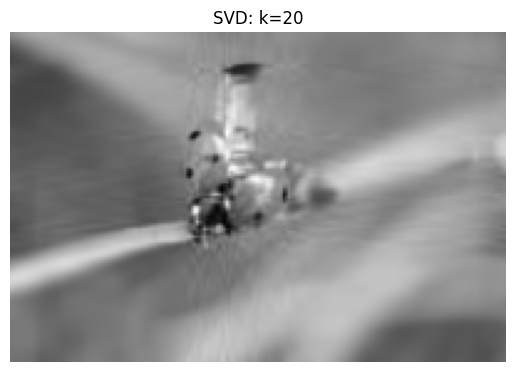

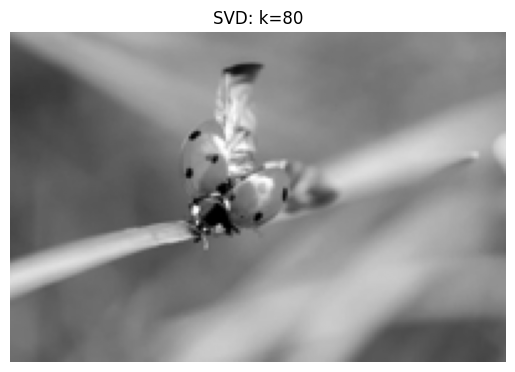

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def rgb2gray(img_rgb):
    img_rgb = img_rgb.astype(np.float64)
    return 0.299*img_rgb[:,:,0] + 0.587*img_rgb[:,:,1] + 0.114*img_rgb[:,:,2]

def svd_k_for_energy(s, target=0.90):
    e = s**2
    cum = np.cumsum(e) / np.sum(e)
    k = int(np.searchsorted(cum, target) + 1)
    return k, cum

def svd_reconstruct_gray(A, k):
    U, s, Vt = np.linalg.svd(A, full_matrices=False)
    Uk = U[:, :k]
    sk = s[:k]
    Vtk = Vt[:k, :]
    Ak = (Uk * sk) @ Vtk
    return Ak, s

path = "2.webp"  
img = Image.open(path).convert("RGB")


img_small = img.resize((200, int(200*img.size[1]/img.size[0])))

img_np = np.array(img_small)
A = rgb2gray(img_np)


U, s, Vt = np.linalg.svd(A, full_matrices=False)
k90, cum = svd_k_for_energy(s, 0.90)

print("Rozmiar obrazu:", A.shape)
print("k dla 90%:", k90)
print("Energia dla k=1:", float(cum[0]))


def recon_for_k(k):
    Uk = U[:, :k]
    sk = s[:k]
    Vtk = Vt[:k, :]
    return (Uk * sk) @ Vtk

A1   = recon_for_k(k90)
A20  = recon_for_k(min(20, len(s)))
A80  = recon_for_k(min(80, len(s)))


plt.figure()
plt.title("Oryginał")
plt.imshow(A, cmap="gray")
plt.axis("off")
plt.show()

plt.figure()
plt.title(f"SVD: k={k90} (>=90% energii)")
plt.imshow(A1, cmap="gray")
plt.axis("off")
plt.show()

plt.figure()
plt.title("SVD: k=20")
plt.imshow(A20, cmap="gray")
plt.axis("off")
plt.show()

plt.figure()
plt.title("SVD: k=80")
plt.imshow(A80, cmap="gray")
plt.axis("off")
plt.show()
